In [2]:
import pandas as pd 

job_salary = pd.read_csv('/Users/patash/PSTB/Week_2/day_3/DS_Job_Salary/datascience_salaries.csv')
job_salary.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [ ]:
# Valeurs manquantes
job_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [ ]:
# Doublons
duplicates = job_salary.duplicated()
print(f"Doublons: {duplicates.sum()}")

Doublons: 0


In [7]:
# Salary_normalized
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

job_salary['salary_normalized'] = scaler.fit_transform(job_salary[['salary']])
job_salary.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,salary_normalized
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545
2,3,Data scientist,Full Time,Senior,London,USD,68000,0.191919
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010


In [8]:
salary_summary = job_salary.groupby('experience_level')['salary'].agg(['mean', 'median'])
print(salary_summary)


                          mean   median
experience_level                       
Entry             36111.111111  30000.0
Executive         76076.923077  46000.0
Mid               51786.885246  51000.0
Senior            75088.033012  68000.0


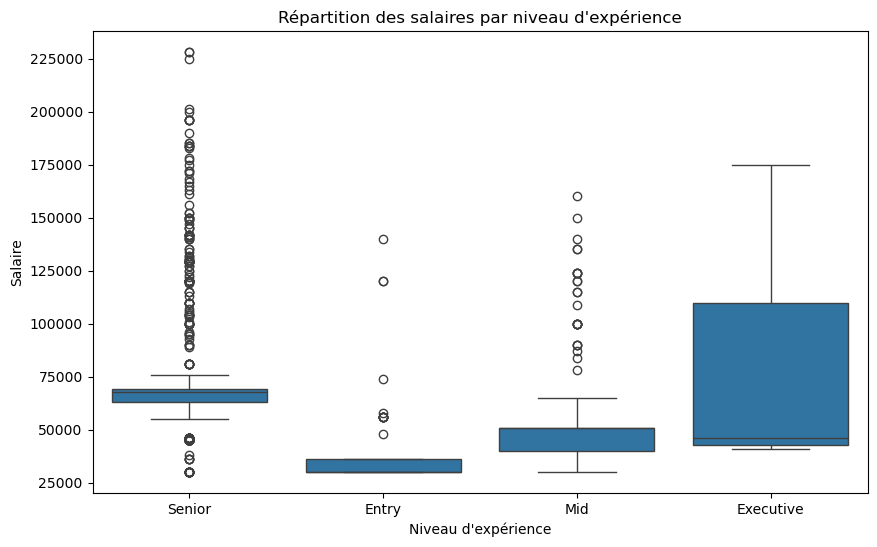

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary', data=job_salary)

plt.title("Répartition des salaires par niveau d'expérience")
plt.xlabel("Niveau d'expérience")
plt.ylabel("Salaire")

plt.show()